In [1]:
# Linear Regression Lesson 1 Hands On


In [22]:
install.packages("car")
install.packages("caret")
install.packages("gvlma")
install.packages("predictmeans")
install.packages("e1071")
install.packages("lmtest")


The downloaded binary packages are in
	/var/folders/q_/vv8mn9pn63l7m3ps3k_2tqdm0000gn/T//RtmpPu0pZH/downloaded_packages

The downloaded binary packages are in
	/var/folders/q_/vv8mn9pn63l7m3ps3k_2tqdm0000gn/T//RtmpPu0pZH/downloaded_packages

The downloaded binary packages are in
	/var/folders/q_/vv8mn9pn63l7m3ps3k_2tqdm0000gn/T//RtmpPu0pZH/downloaded_packages

The downloaded binary packages are in
	/var/folders/q_/vv8mn9pn63l7m3ps3k_2tqdm0000gn/T//RtmpPu0pZH/downloaded_packages

The downloaded binary packages are in
	/var/folders/q_/vv8mn9pn63l7m3ps3k_2tqdm0000gn/T//RtmpPu0pZH/downloaded_packages

The downloaded binary packages are in
	/var/folders/q_/vv8mn9pn63l7m3ps3k_2tqdm0000gn/T//RtmpPu0pZH/downloaded_packages


In [23]:
library("car")
library("caret")
library("gvlma")
library("predictmeans")
library("e1071")
library("lmtest")


In [26]:
Heights = read.csv("/Users/suzejones/Downloads/heights 2.csv")

In [27]:
#Test Assumptions

In [28]:
#Linearity

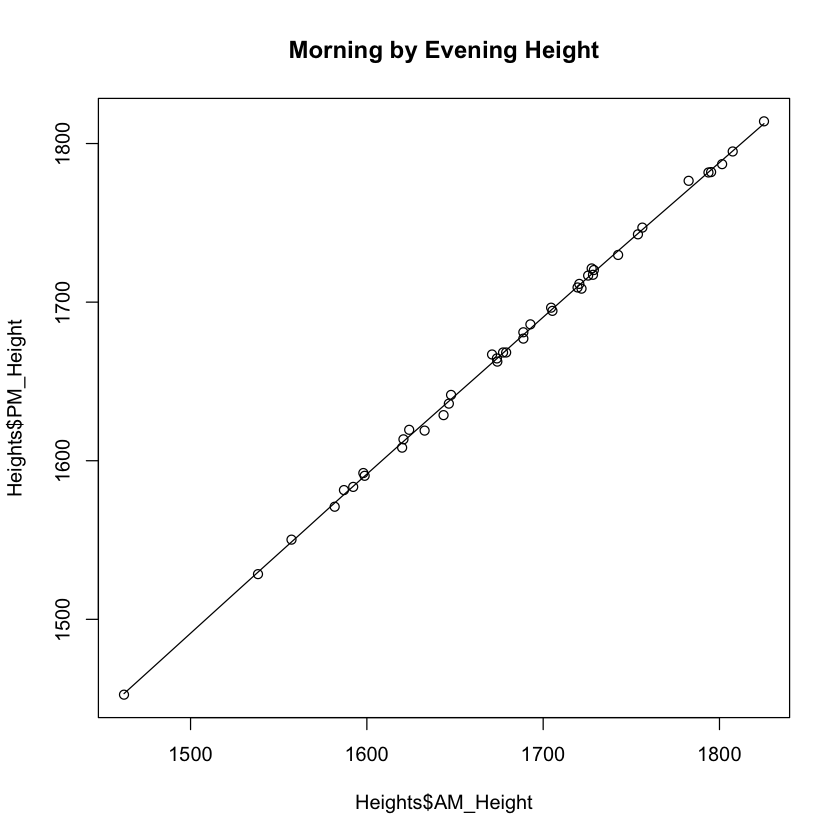

In [30]:
scatter.smooth(x=Heights$AM_Height, y=Heights$PM_Height, main="Morning by Evening Height")

In [31]:
#Looks pretty linear

In [36]:
#Homoscedasticity: Run basic model

In [34]:
lmModHeights = lm(PM_Height~AM_Height, data=Heights)

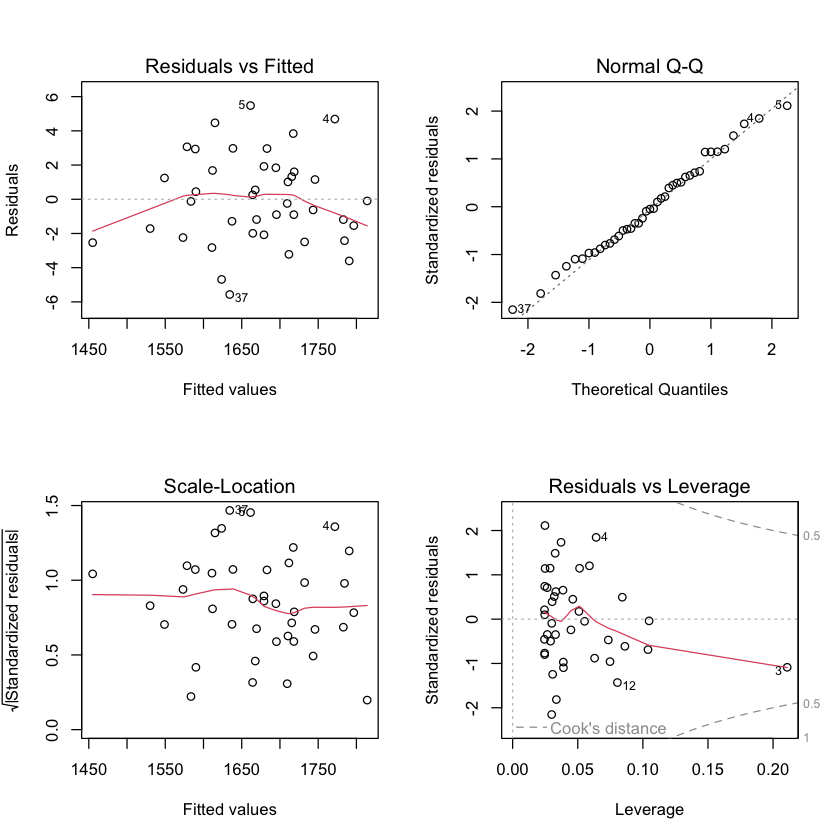

In [35]:
par(mfrow=c(2,2))
plot(lmModHeights)

In [38]:
# a bit of a curve on the graphs, should see flat line... may not meet homoscedasticity

In [39]:
#Breusch-Pagan Test

lmtest::bptest(lmModHeights)


	studentized Breusch-Pagan test

data:  lmModHeights
BP = 0.2079, df = 1, p-value = 0.6484


In [40]:
# Since this test was not significant, there is homoscedasticity! The assumption is met!

In [41]:
# Non-Constant Variance Test

car::ncvTest(lmModHeights)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.1519285, Df = 1, p = 0.6967

In [42]:
#not significant, asumption met

In [43]:
# Homogeneity of Variance

In [44]:
# GVLMA test

gvlma(lmModHeights)


Call:
lm(formula = PM_Height ~ AM_Height, data = Heights)

Coefficients:
(Intercept)    AM_Height  
     8.6537       0.9891  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = lmModHeights) 

                    Value p-value                Decision
Global Stat        2.6500  0.6180 Assumptions acceptable.
Skewness           0.0946  0.7584 Assumptions acceptable.
Kurtosis           0.4953  0.4816 Assumptions acceptable.
Link Function      1.8925  0.1689 Assumptions acceptable.
Heteroscedasticity 0.1676  0.6823 Assumptions acceptable.

In [45]:
#all assumptions acceptable

In [47]:
# Screening for outliers in x space

#Cook's D

CookD(lmModHeights, group=NULL, plot=TRUE, idn=3, newwd=TRUE)

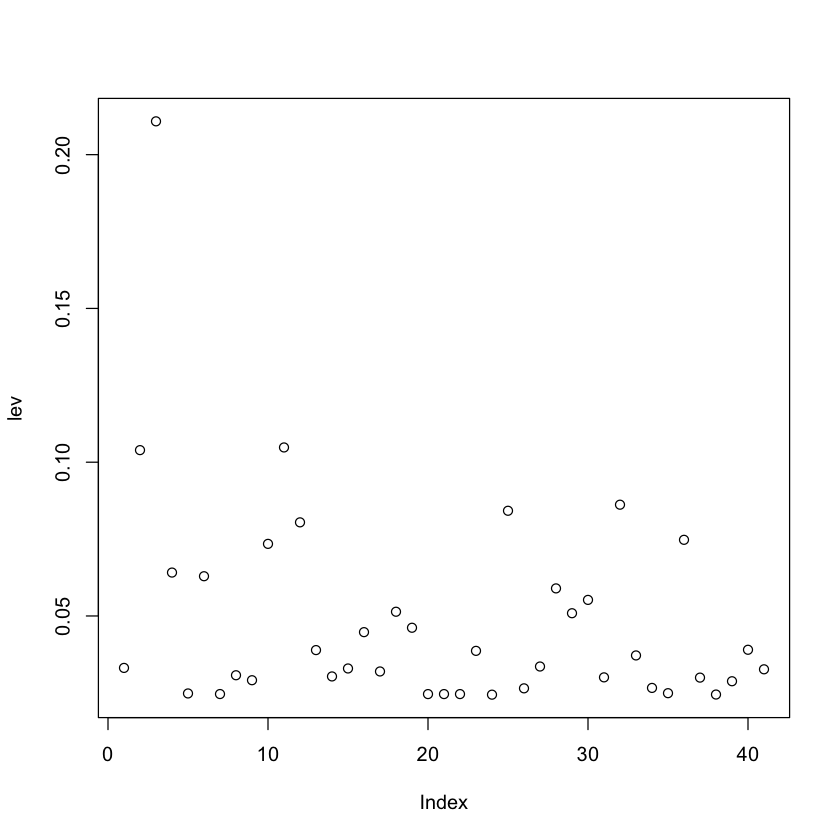

In [48]:
lev = hat(model.matrix(lmModHeights))
plot(lev)

In [49]:
Heights[lev>.2,]


,AM_Height,PM_Height
,<dbl>,<dbl>
3,1462.25,1452.5


In [50]:
#Outliers
car::outlierTest(lmModHeights)
#This is significant, there are outliers

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
    rstudent unadjusted p-value Bonferroni p
37 -2.263445           0.029403           NA

In [51]:
# Screening for outliers in x and y space (influential points)

summary(influence.measures(lmModHeights))

Potentially influential observations of
	 lm(formula = PM_Height ~ AM_Height, data = Heights) :

   dfb.1_ dfb.AM_H dffit cov.r   cook.d hat    
3  -0.54   0.53    -0.56  1.26_*  0.16   0.21_*
11  0.01  -0.01    -0.01  1.18_*  0.00   0.10  
37 -0.19   0.17    -0.40  0.84_*  0.07   0.03  


In [52]:
# Looks like the values on the list are 3, 11, and 37.  Should probably try a model in which outliers are removed 
# from the data

In [55]:
# Creating a new model without outliers to test against the model with outliers

heightsNoO <- Heights[c(1,2,5,6,7,8,9,10,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,
                        36,38,39,40,41),]
lmModHeightsNoO = lm(PM_Height~AM_Height, data=heightsNoO)


In [56]:
# Look at the model summaries for each


In [57]:
summary(lmModHeights)


Call:
lm(formula = PM_Height ~ AM_Height, data = Heights)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5694 -1.9884 -0.1255  1.6838  5.4790 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.653685   8.714042   0.993    0.327    
AM_Height   0.989149   0.005177 191.066   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.627 on 39 degrees of freedom
Multiple R-squared:  0.9989,	Adjusted R-squared:  0.9989 
F-statistic: 3.651e+04 on 1 and 39 DF,  p-value: < 2.2e-16


In [58]:
# Looks like morning height is a significant predictor of evening height and explains 99% of the variance in evening 
# height.

In [59]:
# Looks like morning height is a significant predictor of evening height and explains 99% of the variance in evening 
#height.

summary(lmModHeightsNoO)


Call:
lm(formula = PM_Height ~ AM_Height, data = heightsNoO)

Residuals:
   Min     1Q Median     3Q    Max 
-5.101 -1.743 -0.189  1.678  5.246 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.835236   9.896369   1.701    0.098 .  
AM_Height    0.984392   0.005892 167.079   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.374 on 34 degrees of freedom
Multiple R-squared:  0.9988,	Adjusted R-squared:  0.9987 
F-statistic: 2.792e+04 on 1 and 34 DF,  p-value: < 2.2e-16


In [ ]:
# Very similar results with the model with no outliers, so it's fine to keep and use the original model with all 
#the data!